# Interpolasi Chevbyshev

Interpolasi Chebyshev melibatkan penggunaan **Chebyshev nodes** dan polynomial untuk membangun interpolasi polynomial. Interpolasi ini dapat meminimalkan Runge's phenomenon.

## Chebyshev nodes
Idenya adalah mendistribusikan error secara seragam. Chebyshev nodes dapat dipilih di dalam interval $[a,b]$ dengan

$$\bar{x}_i = \frac{1}{2} (a + b) + \frac{1}{2} (b - a) \cos \left( \frac{2i + 1}{2n + 2}\right), \hspace{1em} i=0,1, \cdots, n$$



## Polynomial Chebyshev

:::{admonition} **Definisi: Polynomial Chebyshev**
:name: poly_chebyshev
:class: note

Jenis pertama dari polynomial Chebyshev didapatkan dari relasi reccurence sebagai berikut

$$ 
\begin{align*}
T_0(x) &= 1 \\
T_1(x) &= x \\
T_{n}(x) &= 2xT_{n-1}(x) - T_{n-2}(x).
\end{align*}
$$

:::

In [10]:
using Polynomials
using Plots

In [33]:
function chebyshev_nodes(n, a, b)
    return [(a + b) / 2 + (b - a) / 2 * cos((2k - 1) * π / (2n)) for k in 1:n]
end

chebyshev_nodes (generic function with 1 method)

In [59]:
function poly_chebyshev(n, x)
    if n == 0
        return 1
    elseif n == 1
        return x
    else
        return 2 * x * poly_chebyshev(n - 1, x) - poly_chebyshev(n - 2, x)
    end
end

poly_chebyshev (generic function with 1 method)

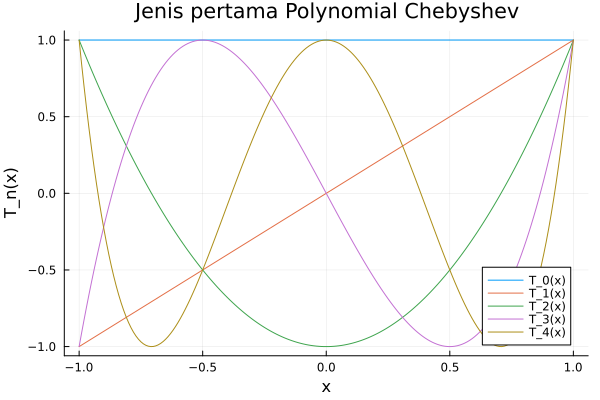

In [61]:
x_vals = -1:0.01:1
plot(x_vals, poly_chebyshev.(0, x_vals), label="T_0(x)", xlabel="x", ylabel="T_n(x)", title="Jenis pertama Polynomial Chebyshev")
plot!(x_vals, poly_chebyshev.(1, x_vals), label="T_1(x)")
plot!(x_vals, poly_chebyshev.(2, x_vals), label="T_2(x)")
plot!(x_vals, poly_chebyshev.(3, x_vals), label="T_3(x)")
plot!(x_vals, poly_chebyshev.(4, x_vals), label="T_4(x)")

In [62]:
N = 20
x = range(-1, 1, length=N)
y = 1 ./(1 .+ 25 .* x .^ 2);

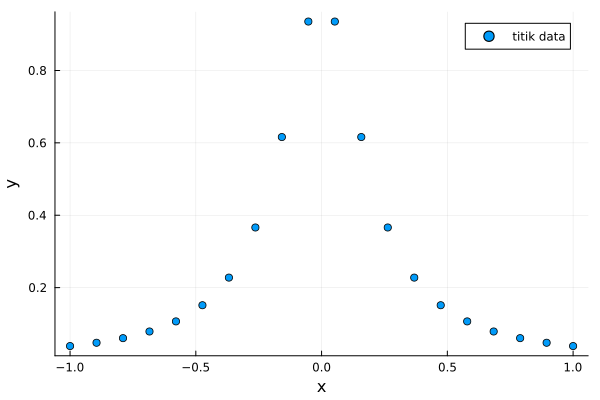

In [63]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

In [68]:
# batas bawah dan batas atas
a, b = x[1], x[N]

(-1.0, 1.0)

In [69]:
nodes = chebyshev_nodes(N, a, b)
p = Polynomials.fit(nodes, y)

Polynomial(0.994748438557261 + 1.0880185641326534e-14*x - 10.119021712066873*x^2 + 5.5067062021407764e-14*x^3 + 75.53343451299384*x^4 - 1.2789769243681803e-13*x^5 - 378.66484095537646*x^6 - 3.922195901395753e-12*x^7 + 1231.5177693292937*x^8 + 3.637978807091713e-12*x^9 - 2584.8212608683743*x^10 + 2.2737367544323206e-11*x^11 + 3462.9594322855933*x^12 + 4.069988790433854e-11*x^13 - 2854.0409110298706*x^14 + 3.865352482534945e-12*x^15 + 1316.8202562806232*x^16 + 5.002220859751105e-12*x^17 - 260.1430708212312*x^18 - 1.0263454198986244e-12*x^19)

## Pengujian

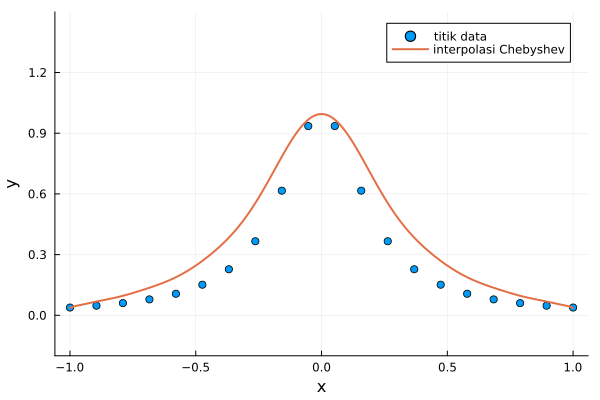

In [71]:
xx = range(a, b, length=1000)
yy = p.(xx)

scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="interpolasi Chebyshev", linewidth=2, ylimits=(-0.2,1.5))